In [14]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

<h1>REDES NEURONALES CON KERAS</h1>
Para defenir redes neuronales en TensorFlow se hace uso de <strong>Keras</strong>.

El valor de salida de una neurona puede expresarse como $y = \sigma (Wx+b)$, donde
$W$ representa la matriz de pesos, $b$ es el término bias, $x$ es la entrada y 
$\sigma$ es la función de activación. 

<center>
<img src="./figures/perceptrons.jpeg"  height="500" width="500"/>
</center>

$$
\boxed{\begin{array}{l}
    z & = \text{tf.matmul}(x, W) + b \\
    y & = \text{tf.sigmoid}(z)
\end{array}}
$$

<h2>CLASE LAYERS</h2>
La clase <strong>Layers</strong> es un bloque utilizado para la construcción de redes neuronales. El mismo permite implementar operaciones de redes neuronales comunes y se utiliza para actualizar pesos, calcular pérdidas y definir la conectividad entre capas.


<div  class="alert alert-block alert-warning">
<b>Métodos de la clase Layer:</b> 
    <ol>
        <li><b>__init__()</b>: Definir atributos de capa personalizados.</li>
        <li><b>build(self, input_shape)</b>: Crear los pesos que dependen de la forma de los tensores de entrada.</li>
        <li><b>call(self, inputs, *args, **kwargs)</b>: Realizar la lógica de aplicar la capa a los tensores de entrada (que deben pasarse como argumento)</li>
    </ol>
</div>

In [15]:
# Definir una capa de una Red Neuronal

class OurDenseLayer(tf.keras.layers.Layer):
  def __init__(self, n_output_nodes):
    super(OurDenseLayer, self).__init__()
    self.n_output_nodes = n_output_nodes

  def build(self, input_shape):
    d = int(input_shape[-1])
    
    self.W = self.add_weight("weight", shape = [d, self.n_output_nodes]) 
    self.b = self.add_weight("bias", shape = [1, self.n_output_nodes]) 
    
  def call(self, x):
    z = tf.matmul(x, self.W) + self.b 

    y = tf.sigmoid(z)

    return y


tf.random.set_seed(1)

layer = OurDenseLayer(3)
layer.build((1,2))

x_input = tf.constant([[1,2.]], shape = (1,2))

y = layer.call(x_input)

print(y.numpy())

[[0.26978594 0.45750415 0.66536945]]


<div  class="alert alert-block alert-info">
<b>Atributos de la clase Layer:</b> 
    <ol>
        <li><b>trainable_weigths</b></li>
        <li><b>non_trainable_weigths</b></li>
        <li><b>weigths</b></li>
    </ol>
</div>


<h2>DENSE LAYER</h2>
TensorFlow tiene definidas varios tipos de capas (Layers) que son comunmente utilizadas en redes 
neuronales, como por ejemplo, las capas densas o completamente conectadas 
(<strong>Dense</strong>). Dense implementa la operación: <strong>output = activation(dot(input, kernel) + bias)</strong>.
Donde kernel es una matriz de pesos creada por la capa.

<div  class="alert alert-block alert-success">
    <b>Definir una capa densa</b> (existen más argumentos):
    <dd>
        <b>tf.keras.layers.Dense</b> (units, activation = None, use_bias = True,
        kernel_initializer = 'glorot_uniform',
        bias_initializer = 'zeros')
    </dd>
    
</div>

<ul>
    <li><b>units</b>: Número entero positivo que determina la 
            dimensionalidad del espacio de salida.</li>
    <li><b>activation</b>: Función de activación a utilizar. En caso de no 
            especificarse no se aplica ninguna (activación "linear").</li>
    <li><b>use_bias</b>: Valor booleano que determina el uso o no del vector bias.</li>
    <li><b>kernel_initializer</b>: Define la manera en que se setea la matriz de pesos inicialmente. 'glorot_uniform' selecciona muestras de una distribución uniforme entre [-limit, limit], donde limit = sqrt(6 / (fan_in + fan_out)) (fan_in es el número de unidades de entrada al tensor de pesos y fan_out es el número de unidades de salida).</li>
    <li><b>bias_initializer</b>: Define la manera en que se setea el vector de bias inicialmente. 'zeros' genera tensores inicializados en 0.</li>
</ul>

<div  class="alert alert-block alert-danger">
    Las capas necesitan saber la forma de las entradas para poder crear los pesos. 
    Si no se especifica esta forma, la capa no tendrá pesos asignados. Los mismos
    serán creados cuando la capa sea llamada por primera vez con una determinada entrada.
    
</div>

In [16]:
from tensorflow.keras.layers import Dense

dense_layer = Dense(2, activation ='sigmoid') 
print(f'La matriz de pesos de la capa es: {dense_layer.weights}.')

out = dense_layer(tf.ones((1, 4))) 
print(f'La matriz de pesos de la capa luego de ser llamada es: {dense_layer.weights}')

La matriz de pesos de la capa es: [].
La matriz de pesos de la capa luego de ser llamada es: [<tf.Variable 'dense_5/kernel:0' shape=(4, 2) dtype=float32, numpy=
array([[ 0.6585548 ,  0.26845598],
       [ 0.02945518, -0.21783829],
       [ 0.16180563, -0.90303636],
       [-0.6447358 ,  0.40940332]], dtype=float32)>, <tf.Variable 'dense_5/bias:0' shape=(2,) dtype=float32, numpy=array([0., 0.], dtype=float32)>]


<h2>SEQUENTIAL MODEL</h2>
Es posible utilizar <b>Sequential model</b> de Keras para crear redes neuronales 
apilando capas (Layers) como si fueran bloques. 

<center>
<img src="./figures/sequential.jpeg"  height="500" width="500"/>
</center>


<div  class="alert alert-block alert-success">
<b>Definición del modelo Sequential:</b> 
    <dd>
       model = keras.Sequential (layers = None) 
    </dd>
</div>

<div  class="alert alert-block alert-warning">
<b>Métodos de la clase Sequential:</b> 
    <ol>
        <li><b>add()</b>: Añade una instancia de Layer encima de la pila de capas.</li>
        <li><b>pop()</b>: Remover la última capa del modelo.</li>
        <li><b>predict()</b>: Genera predicciones de salida para las muestras de entrada.</li>
        <li><b>summary()</b>: Imprime un resumen con información de la red. El número de 
            la columnda parámetros es la suma de los pesos y bias correspondientes a 
            cada determinada capa.</li>
    </ol>
</div>

In [17]:
# Definir una Red Neuronal utilizando Sequential API

from tensorflow.keras import Sequential

n_output_nodes = 3

model = Sequential()

dense_layer = Dense(n_output_nodes, activation ='sigmoid') 

model.add(dense_layer)


<div  class="alert alert-block alert-danger">
    Utilizar model.weights o model.summary() genera un error ya que el modelo no es creado hasta 
    que no recibe datos de entrada por primera vez. 
    <ul>
        <li>El argumento <strong>input_shape</strong> en la primera capa del 
            modelo permite definir la forma de la entrada.</li>
        <li>El objeto <strong>Input</strong> colocado antes de la primera 
            capa del modelo permite definir la forma de la entrada al mismo:
            <dd>
                <i>model.add (keras.Input (shape(2,)))</i>
            </dd></li>
    </ul>
</div>

In [18]:
model.pop()

dense_layer = Dense(n_output_nodes, activation ='sigmoid', input_shape = (2,)) 

model.add(dense_layer)

model.weights

[<tf.Variable 'dense_7/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.57740456, -0.572319  ,  0.00795567],
        [ 0.5992962 ,  0.24269533,  0.8154019 ]], dtype=float32)>,
 <tf.Variable 'dense_7/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [19]:
x_input = tf.constant([[1,2.]], shape = (1,2))

model_output = model.predict(x_input)

print(model_output)

[[0.6504886  0.4782816  0.83736604]]


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


<div  class="alert alert-block alert-info">
<b>Atributos del modelo Sequential:</b> 
    <ol>
        <li><b>layers</b>: Obtener las distintas capas que componen el modelo.</li>
    </ol>
</div>

In [21]:
print(f'Número de capas del modelo: {len(model.layers)}.')
print(f'Lista de capas del modelo: {model.layers}')

Número de capas del modelo: 1.
Lista de capas del modelo: [<tensorflow.python.keras.layers.core.Dense object at 0x7fe51893dd90>]


<div  class="alert alert-block alert-warning">
<b>Otros métodos de la clase Sequential:</b> 
    <ol>
        <li><b>compile()</b>: Configurar el modelo para el entrenamiento.
            <ul>
                <li>optimizer: Controla la tasa de aprendizaje. 'adam' es un método 
                    de gradiente descendente estocástico que ajusta la tasa de 
                    aprendizaje durante el entrenamiento.</li>
                <li>loss function: Especifica la función de costo utilizada 
                    para evaluar el modelo ('categorical_crossentropy', 
                    'mean_squared_error', entre otros).</li>
            </ul>
        <li><b>fit()</b>: Entrenar el modelo durante un número determinado de epochs 
            (iteraciones del dataset completo).</li>
    </ol>
</div>

<h2>CLASE MODEL</h2>
Es posible definir redes neuronales mediante una <b>subclase de la clase Model</b>, la cual agrupa las capas para permitir el entrenamiento y la inferencia del modelo. La subclasificación ofrece la flexibilidad de definir capas, ciclos de entrenamiento, funciones de activación y modelos personalizados. 

In [22]:
# Definir una Red Neuronal utilizando Subclases

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class SubclassModel(tf.keras.Model):

  def __init__(self, n_output_nodes):
    super(SubclassModel, self).__init__()
    self.dense_layer = Dense(n_output_nodes, activation = 'sigmoid')
    
  def call(self, inputs):
    return self.dense_layer(inputs)


n_output_nodes = 3
model = SubclassModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape = (1,2))

print(model.call(x_input).numpy())


[[0.29996255 0.62776643 0.48460072]]


Es posible utilizar argumentos booleanos en la función de llamada para especificar diferentes comportamientos de red, por ejemplo, diferentes comportamientos durante el entrenamiento y la inferencia. Supongamos que en algunos casos queremos que nuestra red simplemente genere la entrada, sin ninguna perturbación:

In [23]:
# Definir un modelo utilizando Subclases y especificando un comportamiento especial

from tensorflow.keras import Model
from tensorflow.keras.layers import Dense

class IdentityModel(tf.keras.Model):

  def __init__(self, n_output_nodes):
    super(IdentityModel, self).__init__()
    self.dense_layer = tf.keras.layers.Dense(n_output_nodes, activation='sigmoid')

  def call(self, inputs, isidentity = False):
    x = self.dense_layer(inputs)
    if isidentity: 
      return inputs 
    return x
  

In [24]:
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

x_input = tf.constant([[1,2.]], shape=(1,2))

out_activate = model.call(x_input) 
out_identity = model.call(x_input, isidentity=True)

print(f"""La salida con funcón de activación es: {out_activate.numpy()}.
La salida con identidad es: {out_identity.numpy()}.""")

La salida con funcón de activación es: [[0.1969584 0.6330007 0.7668015]].
La salida con identidad es: [[1. 2.]].


<h1>GRADIENTE DESCENDENTE CON TENSOR-FLOW</h1>
<b>tf.GradientTape</b> se utiliza para registrar operaciones para calcular gradientes.

Cuando se realiza un pase directo a través de la red, todas las operaciones se graban en una "cinta"; luego, para calcular el gradiente, la cinta se reproduce al revés. De forma predeterminada, la cinta se descarta después de reproducirla al revés. Esto significa que un tf.GradientTape solo puede calcular un gradiente, y las llamadas posteriores arrojan un error de tiempo de ejecución. Sin embargo, podemos calcular varios degradados sobre el mismo cálculo creando una cinta de degradado persistente.

<div  class="alert alert-block alert-info">
<b>Argumentos de GradientTape:</b> 
    <ol>
        <li><b>persistent</b>: Boolean controlling whether a persistent gradient tape is created. False by default, which means at most one call can be made to the gradient() method on this object..</li>
        <li><b>watch_accessed_variables</b>: Boolean controlling whether the tape will automatically watch any (trainable) variables accessed while the tape is active. Defaults to True meaning gradients can be requested from any result computed in the tape derived from reading a trainable Variable. If False users must explicitly watch any Variables they want to request gradients from..</li>
    </ol>
</div>


Primero, veremos cómo podemos calcular gradientes usando GradientTape y acceder a ellos para el cálculo. Definimos la función simple $ y = x ^ 2 $ y calculamos el gradiente:

In [25]:
# Cálculo del Gradiente con GradientTape 

x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x * x

dy_dx = tape.gradient(y, x)

print(dy_dx.numpy())

6.0


<div  class="alert alert-block alert-info">
<b>Métodos de GradientTape:</b> 
    <ol>
        <li><b>gradient</b>: Computes the gradient using operations recorded in context of this tape..</li>
    </ol>
</div>


Al entrenar redes neuronales, se utiliza la diferenciación y el gradiente 
descendente estocástico (SGD) para optimizar una función de pérdida. A 
continuación se presenta un ejemplo en el que se busca minimizar la función 
$ L = (x-x_f) ^ 2 $. Siendo $ x_f $ una variable para un valor deseado que se 
intenta optimizar y $ L $ una pérdida que se busca minimizar.

X inicial: [[-0.00839665]]


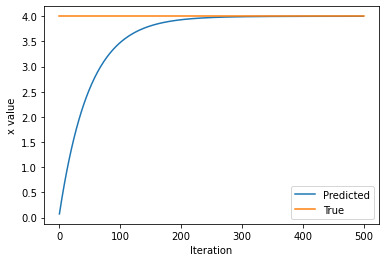

In [26]:
# Minimización de una función con SGD

x = tf.Variable([tf.random.normal([1])])
print("X inicial: {}".format(x.numpy()))

learning_rate = 1e-2 
history = []
x_f = 4

for i in range(500):
  with tf.GradientTape() as tape:
        loss = (x - x_f)**2 

  grad = tape.gradient(loss, x) 
  new_x = x - learning_rate * grad 
  x.assign(new_x)
  history.append(x.numpy()[0])


plt.plot(history)
plt.plot([0, 500],[x_f,x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value');

<h1>CNN EN KERAS</h1>
<dl> 
    <dt><strong>Conv2D</strong></dt>
    <dd>
        <div  class="alert alert-block alert-success">
         keras.layers.Conv2D(filters, kernel_size, strides = (1, 1), padding = 'valid', 
            data_format = None, dilation_rate = (1, 1), activation = None, use_bias = True, 
            kernel_initializer = 'glorot_uniform', bias_initializer = 'zeros', kernel_regularizer = None, 
            bias_regularizer = None, activity_regularizer = None, kernel_constraint = None, 
            bias_constraint = None, **kwargs)
        </div>
        <ul>
            <li><strong>filters</strong>: El número de filtros utilizados en cada posición, 
            es decir, la profundidad de la salida.</li>
            <li><strong>kernel_size</strong>: Una tupla que define el alto y ancho del kernel.</li>
            <li><strong>strides</strong>: Una tupla que define el paso en cada dirección. Por
            defecto posee un valor de (1,1).</li>
            <li><strong>input_shape</strong>: Es requerido únicamente en la primera capa.</li>
        </ul>          
    </dd>
    <br>
    <dt><strong>MaxPooling2D<strong></dt>
    <dd>
        <div  class="alert alert-block alert-success">
         keras.layers.pooling.MaxPooling2D(pool_size = (2, 2), strides = None, padding = 'valid', data_format = None)
        </div>
        <ul>
            <li><strong>pool_size</strong>: Una tupla que define el tamaño de la grilla
                utilizada para realizar el pooling.</li>
            <li><strong>strides</strong>: Por defecto se asume que el tamaño del paso es
                igual al tamaño de la grilla. De no ser así debe ser especificado.</li>
        </ul>  
      </dd>
    <br>
    <dt><strong>Flatten</strong></dt>
    <dd>
        <div  class="alert alert-block alert-success">
        keras.layers.Flatten(data_format = None, **kwargs)
        </div>
        Transforma la entrada en un vector unidimensional. Por lo que es utilizado
        generalmente para realizar el paso entre redes convolucionales a redes
        completamente conectadas.
    </dd>
    <br>
    <dt><strong>ZeroPadding2D</strong></dt>
    <dd>
        <div  class="alert alert-block alert-success">
        keras.layers.ZeroPadding2D(padding = (1, 1), data_format = None, **kwargs)
        </div>
        Añade filas o columnas de ceros arriba, abajo, a la izquierda y derecha del tensor de una imagen.
    </dd>
</dl>